# Text Classification: Name Gender

Here is a partition of the name gender data into training, dev-test, and test data as shown in the lectures:

In [2]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\zhong\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [15]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names = names[1000:]
devtest_names = names[500:1000]
test_names = names[:500]

And here is one of the classifiers given in the lectures.

In [4]:
def gender_features2(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}
train_set2 = [(gender_features2(n), g) for n, g in train_names]
devtest_set2 = [(gender_features2(n), g) for n, g in devtest_names]
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)
print(nltk.classify.accuracy(classifier2, train_set2))
print(nltk.classify.accuracy(classifier2, devtest_set2))

0.7926267281105991
0.77


### Exercise: Using more information
Define a new function `gender_features5` that takes, as features, any suffixes of size 1, 2, 3, 4, and 5. Examine the accuracy results. What can you conclude from this new classifier?

In [5]:
def gender_features5(word):
    return {
            'suffix1': word[-1],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'suffix4': word[-4:],
            'suffix5': word[-5:]        
           }

train_set5 = [(gender_features5(n), g) for n,g in train_names]
devtest_set5 = [(gender_features5(n), g) for n,g in devtest_names]
classifier5 = nltk.NaiveBayesClassifier.train(train_set5)

print(nltk.classify.accuracy(classifier5, train_set5))
print(nltk.classify.accuracy(classifier5, devtest_set5))

0.9003456221198156
0.802


The performance of training data is much better than the devtest, therefore the training data is over-fitting.

### Exercise: Plot the impact of the training size

The following code plots the classifier accuracy on the training and dev-test set as we increase the training size. Examine the plot and answer the following questions:

1. From what amount of training data you would judge that the system stops over-fitting?
2. From what amount of training data would you say that there is no need to add more training data?

In [6]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier2 = nltk.NaiveBayesClassifier.train(train_set2[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2, train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2, devtest_set2))

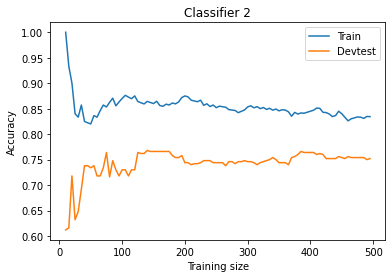

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

1. Over-fitting remains when there are 500 sample data.
2. When there are around 400 training data, there is no need to add more training data. The reason is that's the peak of accuracy of devtest data. After that, the devtest data accuracy keeps declining, and the over-fitting increases again.

### Exercise: Repeat the analysis using sk-learn

The lectures show how to use sklearn to implement the name classifier. Replicate the work in this workshop and try to answer the same questions as above.

1. Is it better to use the last two characters, or the last 5 characters?
2. From what amount of training data you would judge that the system stops overfitting?
3. From what amount of training data would you say that there is no need to add more training data?


In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result = [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i >= 0:
        result[i] = 1
    else:
        result[len(alphabet)] = 1
    return result

def sk_gender_features2(word):
    """generate features of the last two characters"""
    assert len(word) >=2
    last = one_hot_character(word[-1])
    last_two = one_hot_character(word[-2])
    return last_two + last 


def sk_gender_features5(word):
    """generate features of the last five characters"""
    features = []
    for i in range(5):
        if i<=len(word):
            features+=one_hot_character(word[-i])
        else:
            features+=one_hot_character(' ')
    return features

In [58]:
""" accuracy score for features of the last two characters """
sk_train_set2 = [(sk_gender_features2(n), g) for n, g in train_names]
sk_devtest_set2 = [(sk_gender_features2(n), g) for n, g in devtest_names]
sk_classifier2 = MultinomialNB()
train2_X, train2_y = zip(*sk_train_set2)
sk_classifier2.fit(train2_X, train2_y)
devtest2_X, devtest2_y = zip(*sk_devtest_set2)
devtest_predictions = sk_classifier2.predict(devtest2_X)
accuracy_score(devtest2_y, devtest_predictions)

0.752

In [59]:
""" accuracy score features of the last five characters """
sk_train_set5 = [(sk_gender_features5(n), g) for n, g in train_names]
sk_devtest_set5 = [(sk_gender_features5(n), g) for n, g in devtest_names]
sk_classifier5 = MultinomialNB()
train5_X, train5_y = zip(*sk_train_set5)
sk_classifier5.fit(train5_X, train5_y)
devtest5_X, devtest5_y = zip(*sk_devtest_set5)
devtest5_predictions = sk_classifier5.predict(devtest5_X)
accuracy_score(devtest5_y, devtest5_predictions)

0.786

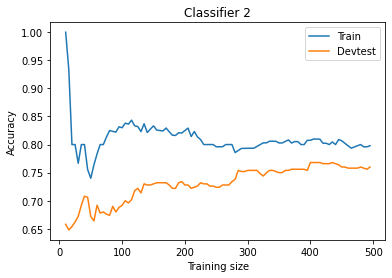

In [60]:
""" Last 2 characters feature """

train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier2 = MultinomialNB()
    train2_X, train2_y = zip(*sk_train_set2[:n])
    classifier2.fit(train2_X, train2_y)
    train_predictions = classifier2.predict(train2_X)
    train_accuracy2.append(accuracy_score(train2_y, train_predictions))
    # * test the whole devtest dataset
    devtest2_X, devtest2_y = zip(*sk_devtest_set2)
    devtest_predictions = classifier2.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y, devtest_predictions))

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

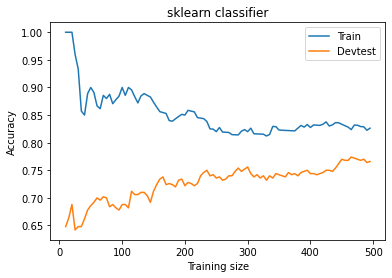

In [61]:
""" Last 5 characters feature """
train_set = [(gender_features7(n), g) for n,g in train_names]
devtest_set = [(gender_features7(n), g) for n,g in devtest_names]

train_accuracy = []
devtest_accuracy = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier = MultinomialNB()
    train_x, train_y = zip(*train_set[:n])
    classifier.fit(train_x, train_y)
    devtest_x, devtest_y = zip(*devtest_set)
    devtest_predictions = classifier.predict(devtest_x)
    train_predictions = classifier.predict(train_x)
    devtest_accuracy.append(accuracy_score(devtest_y, devtest_predictions))
    train_accuracy.append(accuracy_score(train_y, train_predictions))

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy, label="Train")
plt.plot(nsamples, devtest_accuracy, label="Devtest")
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('sklearn classifier')
plt.legend()